## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd
import os
import matplotlib
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn import model_selection
import tensorflow as tf

## Data Reading and Merging

In [2]:
df_fets=["age","sex","cp","trestbps","chol","fbs",
         "restecg","thalach","exang","oldpeak","slope",
         "ca","thal","target"]
a='processed.cleveland.data'
b='processed.hungarian.data'
c='processed.switzerland.data'
hrt_csvs=[a, b, c]
h_df_1=pd.read_csv(hrt_csvs[0],names=df_fets)
h_df_2=pd.read_csv(hrt_csvs[0],names=df_fets)
h_df_3=pd.read_csv(hrt_csvs[0],names=df_fets)
heart1=pd.concat([h_df_1,h_df_2,h_df_3])
print(len(h_df_1),len(h_df_2),len(h_df_3))
print("Total Data Inatances: ",len(heart1))
heart1.head()

303 303 303
Total Data Inatances:  909


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Data Processing

In [3]:
heart1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       909 non-null    float64
 1   sex       909 non-null    float64
 2   cp        909 non-null    float64
 3   trestbps  909 non-null    float64
 4   chol      909 non-null    float64
 5   fbs       909 non-null    float64
 6   restecg   909 non-null    float64
 7   thalach   909 non-null    float64
 8   exang     909 non-null    float64
 9   oldpeak   909 non-null    float64
 10  slope     909 non-null    float64
 11  ca        909 non-null    object 
 12  thal      909 non-null    object 
 13  target    909 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 106.5+ KB


In [4]:
cat_fts=heart1.dtypes[heart1.dtypes=='object'].index.tolist()
heart1[cat_fts[0]]
cat_conv=[[] for i in range(len(cat_fts))]
for i in range(len(cat_fts)):
    for j in range(len(heart1[cat_fts[i]].tolist())):
        if heart1[cat_fts[i]].tolist()[j]=="?":
            cat_conv[i].append(0)
        else:
            cat_conv[i].append(heart1[cat_fts[i]].tolist()[j])
    heart1[cat_fts[i]]=np.array(cat_conv[i],float)
heart1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       909 non-null    float64
 1   sex       909 non-null    float64
 2   cp        909 non-null    float64
 3   trestbps  909 non-null    float64
 4   chol      909 non-null    float64
 5   fbs       909 non-null    float64
 6   restecg   909 non-null    float64
 7   thalach   909 non-null    float64
 8   exang     909 non-null    float64
 9   oldpeak   909 non-null    float64
 10  slope     909 non-null    float64
 11  ca        909 non-null    float64
 12  thal      909 non-null    float64
 13  target    909 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 106.5 KB


## Target Conversion

In [5]:
heart=heart1.copy()
heart['target']=heart['target'].replace(heart['target'].unique(),[0,1,1,1,1])
heart['target']=heart['target'].replace(heart['target'].unique(),['Healthy','Heart_Disease'])
heart['target'].value_counts()

Healthy          492
Heart_Disease    417
Name: target, dtype: int64

## Feature Conversion

In [6]:
bkp_df=heart.copy()
bkp_df['sex']=bkp_df['sex'].replace(bkp_df['sex'].unique(),['Male','Female'])
bkp_df['cp']=bkp_df['cp'].replace(bkp_df['cp'].unique(),['Type-1','Type-4','Type-3','Type-2'])
ha=bkp_df[bkp_df['target']=="Heart_Disease"]
hel=bkp_df[bkp_df['target']=="Healthy"]

## Data Visualization

In [7]:
def VizTypes(df,ft,nms_fts,grph):
    pd.crosstab(df[ft],df['target']).plot(kind=grph,figsize=(8,4),color=["#00FA9A","#FF6347"])
    matplotlib.pyplot.title('Heart Attack by {}'.format(nms_fts), fontsize=15,color='#6A0DAD')
    matplotlib.pyplot.xlabel('{}'.format(nms_fts), fontsize=12,color='#6A0DAD')
    matplotlib.pyplot.ylabel('Count', fontsize=12,color='#6A0DAD')
    matplotlib.pyplot.grid()
    matplotlib.pyplot.show()

In [8]:
def VizHist(df,ft,mnng,ppl,clr):
    matplotlib.pyplot.figure(figsize=(8,4))
    matplotlib.pyplot.hist(df[ft],color=clr)
    matplotlib.pyplot.title('{} for {} People'.format(mnng,ppl), fontsize=15,color='#6A0DAD')
    matplotlib.pyplot.xlabel('Age', fontsize=12,color='#6A0DAD')
    matplotlib.pyplot.ylabel('Distribution', fontsize=12,color='#6A0DAD')
    matplotlib.pyplot.grid()
    matplotlib.pyplot.show()

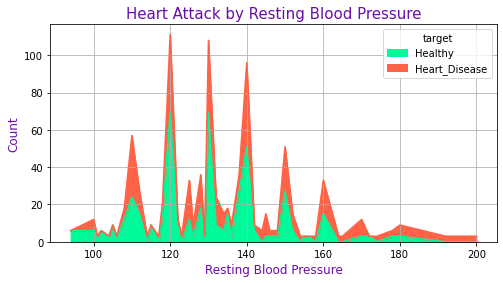

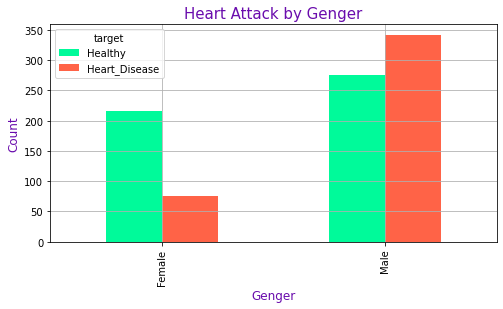

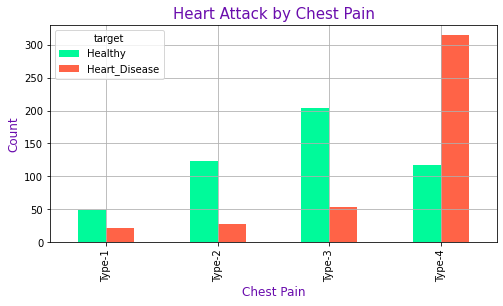

In [9]:
fet_vz=['trestbps','sex','cp']
fetnm=['Resting Blood Pressure','Genger','Chest Pain']
chrt_typ=['area','bar','bar']

for x in range(len(fet_vz)):
    VizTypes(bkp_df,fet_vz[x],fetnm[x],chrt_typ[x])


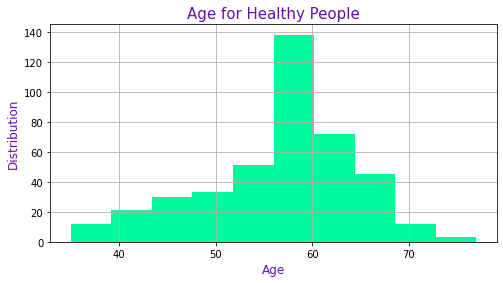

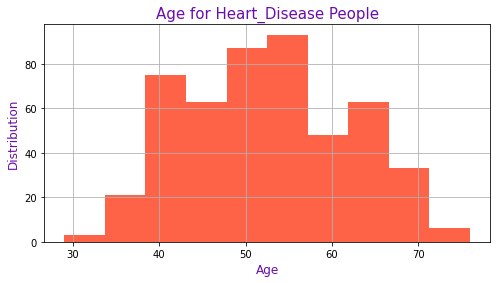

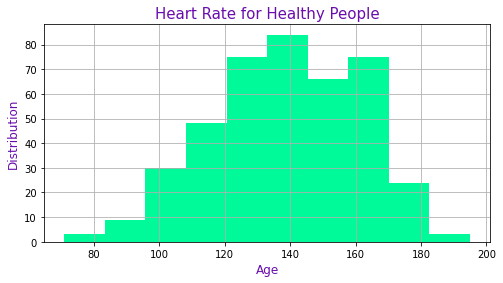

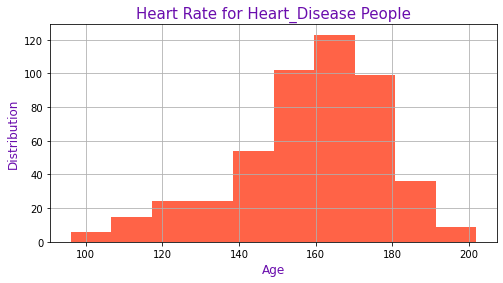

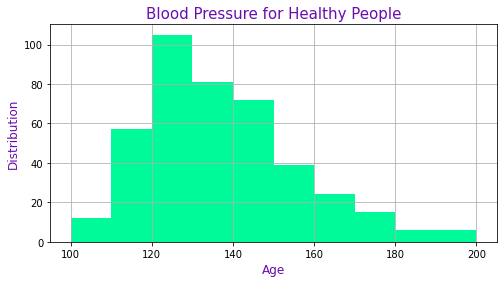

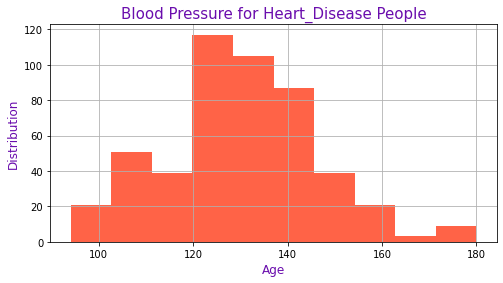

In [10]:
fts_vz2=['age','thalach','trestbps']
fetnm_2=['Age','Heart Rate','Blood Pressure']
terms=['Healthy','Heart_Disease']
clrs=["#00FA9A","#FF6347"]
dfs=[ha,hel]
for y in range(len(fts_vz2)):
    for m in range(len(terms)):
        VizHist(dfs[m],fts_vz2[y],fetnm_2[y],terms[m],clrs[m])

## Feature Selection

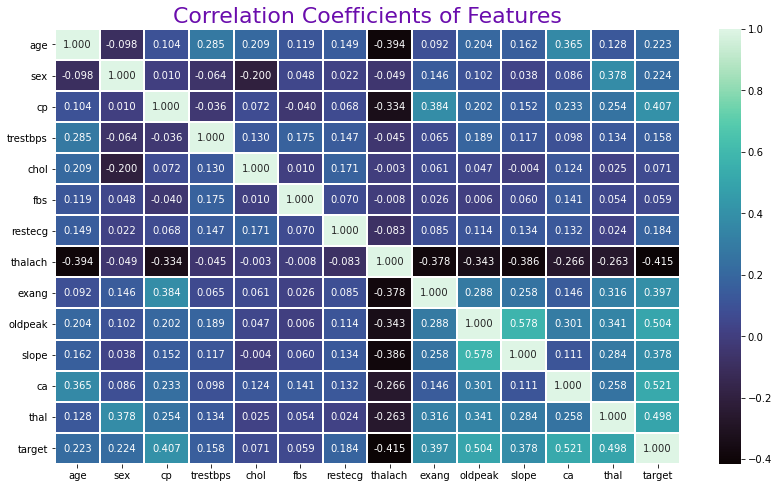

In [11]:
heart1['target']=heart1['target'].replace(heart1['target'].unique(),[i+1 for i in heart1['target'].unique()])
matplotlib.pyplot.figure(figsize=(14,8))
matplotlib.pyplot.title("Correlation Coefficients of Features", fontsize=22,color='#6A0DAD')
sns.heatmap(heart1.corr(),annot=True,cmap='mako',fmt='.3f',linewidths=1)
matplotlib.pyplot.show()

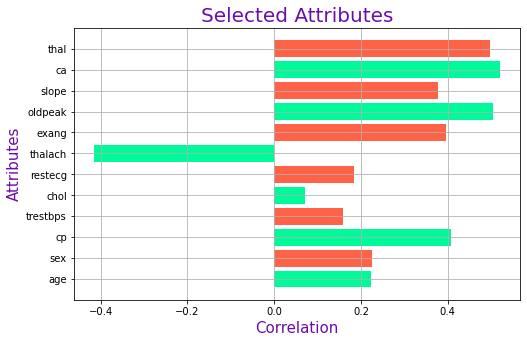

Feature: age
Coefficient: 0.223
________________________
Feature: sex
Coefficient: 0.224
________________________
Feature: cp
Coefficient: 0.407
________________________
Feature: trestbps
Coefficient: 0.158
________________________
Feature: chol
Coefficient: 0.071
________________________
Feature: restecg
Coefficient: 0.184
________________________
Feature: thalach
Coefficient: -0.415
________________________
Feature: exang
Coefficient: 0.397
________________________
Feature: oldpeak
Coefficient: 0.504
________________________
Feature: slope
Coefficient: 0.378
________________________
Feature: ca
Coefficient: 0.521
________________________
Feature: thal
Coefficient: 0.498
________________________


In [12]:
CE_fets=heart1.corr()['target']
CE_Prds=CE_fets.index.tolist()[:-1]
Prd_ix=CE_fets.tolist()[:-1]
CE_pos=[]
CE_neg=[]
OPT_Fts=[]
CE_Fts=[]
for i in range(len(Prd_ix)):
    if Prd_ix[i]<0:
        CE_neg.append(Prd_ix[i])
    else:
        CE_pos.append(Prd_ix[i])
CE_neg=np.array(CE_neg)
CE_pos=np.array(CE_pos)
for i in range(len(Prd_ix)):
    if Prd_ix[i]>CE_pos.min() or Prd_ix[i]<-0.1:
        OPT_Fts.append(CE_Prds[i])
        CE_Fts.append(Prd_ix[i])
matplotlib.pyplot.figure(figsize=(8,5))
matplotlib.pyplot.title("Selected Attributes", fontsize=20,color='#6A0DAD')
matplotlib.pyplot.barh(OPT_Fts,CE_Fts,color=["#00FA9A","#FF6347"])
matplotlib.pyplot.xlabel("Correlation", fontsize=15,color='#6A0DAD')
matplotlib.pyplot.ylabel("Attributes", fontsize=15,color='#6A0DAD')
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

for i in range(len(OPT_Fts)):
    print("Feature: {}\nCoefficient: {}\n________________________".format(OPT_Fts[i],round(CE_Fts[i],3)))

## Data Scaling

In [39]:
DS_Hrt = sklearn.utils.resample(heart, replace = True, n_samples = len(heart)*10, random_state = 0)
DS_Hrt=pd.concat([DS_Hrt[OPT_Fts],DS_Hrt['target']],axis=1)
DS_Hrt.shape

(9090, 13)

## Data Split

In [55]:
X=DS_Hrt[OPT_Fts]
y=DS_Hrt['target']
y1=y.replace(y.unique(),[0,1])
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,y1, train_size=0.8, random_state=10)
print(y_test.value_counts())

0    981
1    837
Name: target, dtype: int64


In [56]:
metlist=[[],[],[],[],[],[],[],[]] # Eva.Acc, Training Acc, Eva. Loss, Training Loss, Test Acc, Test Prec, Test Recall, Test F1

## Applying Model-1 (ANN_1) with 3 Hidden layesr and Softmax as Output

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 16)                208       
_________________________________________________________________
dense_101 (Dense)            (None, 64)                1088      
_________________________________________________________________
dense_102 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_103 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_104 (Dense)            (None, 2)                 130       
Total params: 9,746
Trainable params: 9,746
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
291/291 [==============================] - 1s 3ms/step - loss: 0.7488 - accuracy: 0.6952 - val_loss: 0.456

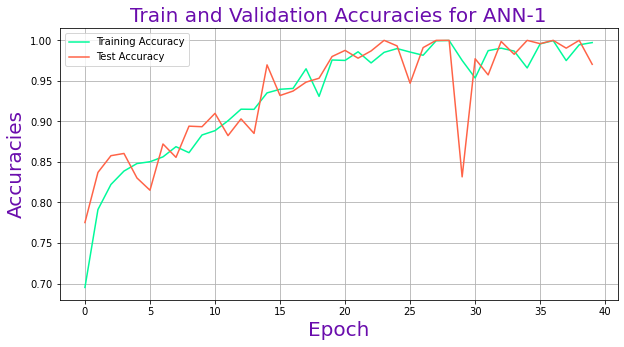

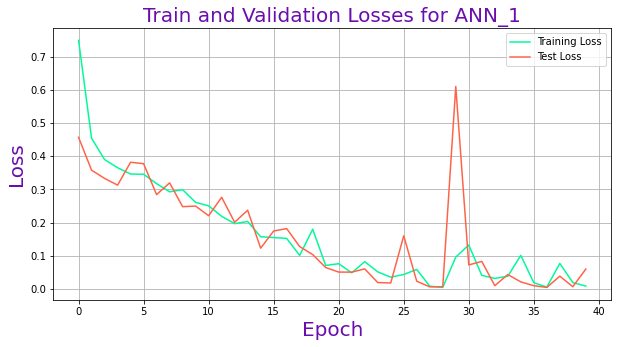

In [57]:
ISZ = DS_Hrt.shape[1]-1
OSZ = 2 
ANN_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(ISZ,), activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(OSZ, activation='softmax') # output layer
])

ANN_1.summary()

ANN_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
batch_size = 20
epochs = 40
ANN_1_Hist = ANN_1.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.2)

l1,a1=ANN_1.evaluate(x_test,y_test)
print("Evaluation Result for ANN_1")
print("=================================================")
print("Accuracy(Evaluation): {}%\nLoss(Evaluation): {}".format(round(a1,4)*100, round(l1,4)))
print("=================================================")
l_tr_1,a_tr_1=ANN_1.evaluate(x_train,y_train)
print("Accuracy(Train): {}%\nLoss(Train): {}".format(round(a_tr_1,4)*100, round(l_tr_1,4)))
print("=================================================")

metlist[0].append(round(a1,4)*100)
metlist[1].append(round(a_tr_1,4)*100)
metlist[2].append(round(l1,4))
metlist[3].append(round(l_tr_1,4))

prd_ann1=ANN_1.predict(x_test)
tf_prediction1 = tf.nn.softmax(prd_ann1, axis=1)
prd_ann1_label = tf.argmax(tf_prediction1, axis=1)
prd_ann1_label = prd_ann1_label.numpy()
y_test=y_test.replace(y_test.unique(),["Healthy","Heart_Disease"])
print("Classification Outcome for ANN-1\n")
print("=================================================")
prd_ann1_label=pd.Series(prd_ann1_label)
prd_ann1_label=prd_ann1_label.replace(prd_ann1_label.unique(),['Healthy','Heart_Disease'])
ann1_clfdf=pd.DataFrame({"Actual":y_test.tolist(),"Predicted":prd_ann1_label.tolist()})
cnf_ann1=pd.crosstab(ann1_clfdf['Actual'],ann1_clfdf['Predicted'],rownames=['True'], colnames=['Predicted'], margins=True)
print(cnf_ann1.iloc[:2,:2])

print("Accuracy (ANN-1): ",round(sklearn.metrics.accuracy_score(ann1_clfdf["Actual"],ann1_clfdf["Predicted"]),4)*100,"%")
print("Precision (ANN-1): ",round(sklearn.metrics.precision_score(ann1_clfdf["Actual"],ann1_clfdf["Predicted"], average='micro'),4)*100,"%")
print("Recall (ANN-1): ",round(sklearn.metrics.recall_score(ann1_clfdf["Actual"],ann1_clfdf["Predicted"], average='micro'),4)*100,"%")
print("F1-Score (ANN-1): ",round(sklearn.metrics.f1_score(ann1_clfdf["Actual"],ann1_clfdf["Predicted"], average='micro'),4)*100,"%")
print(sklearn.metrics.classification_report(ann1_clfdf["Actual"],ann1_clfdf["Predicted"]))
print("=================================================")

metlist[4].append(round(sklearn.metrics.accuracy_score(ann1_clfdf["Actual"],ann1_clfdf["Predicted"]),4)*100)
metlist[5].append(round(sklearn.metrics.precision_score(ann1_clfdf["Actual"],ann1_clfdf["Predicted"], average='micro'),4)*100)
metlist[6].append(round(sklearn.metrics.recall_score(ann1_clfdf["Actual"],ann1_clfdf["Predicted"], average='micro'),4)*100)
metlist[7].append(round(sklearn.metrics.f1_score(ann1_clfdf["Actual"],ann1_clfdf["Predicted"], average='micro'),4)*100)


ANN_1_df=pd.DataFrame({
    "Epoch":[i+1 for i in range(epochs)],
    "Training Accuracy":ANN_1_Hist.history['accuracy'],
    "Test Accuracy":ANN_1_Hist.history['val_accuracy'],
    "Training Loss":ANN_1_Hist.history['loss'],
    "Test Loss":ANN_1_Hist.history['val_loss']
})
ANN_1_df.to_csv("ANN_1_Res.csv")

ANN_1_df.iloc[:,1:3].plot(kind="line",figsize=(10,5),color=clrs)
matplotlib.pyplot.title("Train and Validation Accuracies for ANN-1",fontsize=20,color='#6A0DAD')
matplotlib.pyplot.xlabel("Epoch",fontsize=20,color='#6A0DAD')
matplotlib.pyplot.ylabel("Accuracies",fontsize=20,color='#6A0DAD')
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

ANN_1_df.iloc[:,3:].plot(kind="line",figsize=(10,5),color=clrs)
matplotlib.pyplot.title("Train and Validation Losses for ANN_1",fontsize=20,color='#6A0DAD')
matplotlib.pyplot.xlabel("Epoch",fontsize=20,color='#6A0DAD')
matplotlib.pyplot.ylabel("Loss",fontsize=20,color='#6A0DAD')
matplotlib.pyplot.grid()
matplotlib.pyplot.show()



## Applying Model-2 (ANN_2) with 6 Hidden layesr and Softmax as Output

0    981
1    837
Name: target, dtype: int64
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 16)                208       
_________________________________________________________________
dense_106 (Dense)            (None, 64)                1088      
_________________________________________________________________
dense_107 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_108 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_109 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_110 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_11

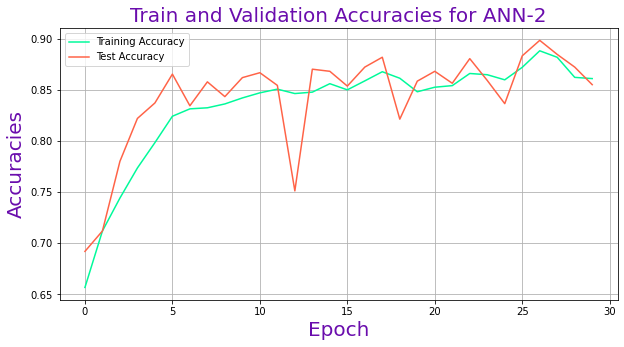

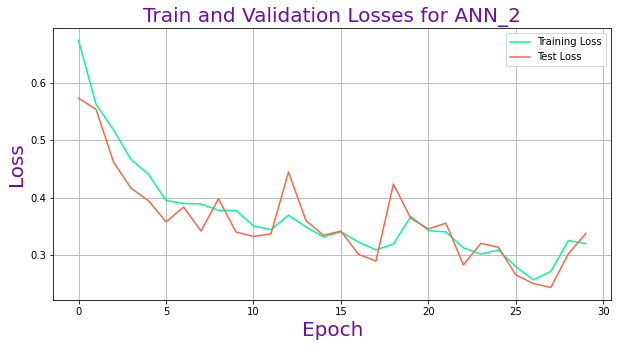

In [58]:
X=DS_Hrt[OPT_Fts]
y=DS_Hrt['target']
y1=y.replace(y.unique(),[0,1])
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,y1, train_size=0.8, random_state=10)
print(y_test.value_counts())
ISZ = DS_Hrt.shape[1]-1
OSZ = 2 
ANN_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(ISZ,), activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(OSZ, activation='softmax') # output layer
])

ANN_2.summary()

ANN_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
batch_size = 32
epochs = 30
ANN_2_Hist = ANN_2.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.2)

l2,a2=ANN_2.evaluate(x_test,y_test)
print("Evaluation Result for ANN_2")
print("=================================================")
print("Accuracy(Evaluation): {}%\nLoss(Evaluation): {}".format(round(a2,4)*100, round(l2,4)))
print("=================================================")
l_tr_2,a_tr_2=ANN_2.evaluate(x_train,y_train)
print("Accuracy(Train): {}%\nLoss(Train): {}".format(round(a_tr_2,4)*100, round(l_tr_2,4)))
print("=================================================")

metlist[0].append(round(a2,4)*100)
metlist[1].append(round(a_tr_2,4)*100)
metlist[2].append(round(l2,4))
metlist[3].append(round(l_tr_2,4))

prd_ann2=ANN_2.predict(x_test)
tf_prediction1 = tf.nn.softmax(prd_ann2, axis=1)
prd_ann2_label = tf.argmax(tf_prediction1, axis=1)
prd_ann2_label = prd_ann2_label.numpy()
y_test=y_test.replace(y_test.unique(),["Healthy","Heart_Disease"])
print("Classification Outcome for ANN-2\n")
print("=================================================")
prd_ann2_label=pd.Series(prd_ann2_label)
prd_ann2_label=prd_ann2_label.replace(prd_ann2_label.unique(),['Healthy','Heart_Disease'])
ann2_clfdf=pd.DataFrame({"Actual":y_test.tolist(),"Predicted":prd_ann2_label.tolist()})
cnf_ann2=pd.crosstab(ann2_clfdf['Actual'],ann2_clfdf['Predicted'],rownames=['True'], colnames=['Predicted'], margins=True)
print(cnf_ann2.iloc[:2,:2])

print("Accuracy (ANN-2): ",round(sklearn.metrics.accuracy_score(ann2_clfdf["Actual"],ann2_clfdf["Predicted"]),4)*100,"%")
print("Precision (ANN-2): ",round(sklearn.metrics.precision_score(ann2_clfdf["Actual"],ann2_clfdf["Predicted"], average='micro'),4)*100,"%")
print("Recall (ANN-2): ",round(sklearn.metrics.recall_score(ann2_clfdf["Actual"],ann2_clfdf["Predicted"], average='micro'),4)*100,"%")
print("F1-Score (ANN-2): ",round(sklearn.metrics.f1_score(ann2_clfdf["Actual"],ann2_clfdf["Predicted"], average='micro'),4)*100,"%")
print(sklearn.metrics.classification_report(ann2_clfdf["Actual"],ann2_clfdf["Predicted"]))
print("=================================================")

metlist[4].append(round(sklearn.metrics.accuracy_score(ann2_clfdf["Actual"],ann2_clfdf["Predicted"]),4)*100)
metlist[5].append(round(sklearn.metrics.precision_score(ann2_clfdf["Actual"],ann2_clfdf["Predicted"], average='micro'),4)*100)
metlist[6].append(round(sklearn.metrics.recall_score(ann2_clfdf["Actual"],ann2_clfdf["Predicted"], average='micro'),4)*100)
metlist[7].append(round(sklearn.metrics.f1_score(ann2_clfdf["Actual"],ann2_clfdf["Predicted"], average='micro'),4)*100)


ANN_2_df=pd.DataFrame({
    "Epoch":[i+1 for i in range(epochs)],
    "Training Accuracy":ANN_2_Hist.history['accuracy'],
    "Test Accuracy":ANN_2_Hist.history['val_accuracy'],
    "Training Loss":ANN_2_Hist.history['loss'],
    "Test Loss":ANN_2_Hist.history['val_loss']
})
ANN_2_df.to_csv("ANN_2_Res.csv")

ANN_2_df.iloc[:,1:3].plot(kind="line",figsize=(10,5),color=clrs)
matplotlib.pyplot.title("Train and Validation Accuracies for ANN-2",fontsize=20,color='#6A0DAD')
matplotlib.pyplot.xlabel("Epoch",fontsize=20,color='#6A0DAD')
matplotlib.pyplot.ylabel("Accuracies",fontsize=20,color='#6A0DAD')
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

ANN_2_df.iloc[:,3:].plot(kind="line",figsize=(10,5),color=clrs)
matplotlib.pyplot.title("Train and Validation Losses for ANN_2",fontsize=20,color='#6A0DAD')
matplotlib.pyplot.xlabel("Epoch",fontsize=20,color='#6A0DAD')
matplotlib.pyplot.ylabel("Loss",fontsize=20,color='#6A0DAD')
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

In [63]:
metlistarr=np.array(metlist).T
metlistarr
metlist

[[97.25, 87.29],
 [97.37, 85.85000000000001],
 [0.0601, 0.3102],
 [0.0559, 0.3286],
 [97.25, 87.29],
 [97.25, 87.29],
 [97.25, 87.29],
 [97.25, 87.29]]

In [65]:
HrtRes=pd.DataFrame({
    "Model": ["ANN-1","ANN-2"],
    "Evaluation Accuracy":metlist[0],
    "Training Accuracy":metlist[1],
    "Evaluation Loss":metlist[2],
    "Training Loss":metlist[3],
    "Test Accuracy":metlist[4],
    "Test Precision":metlist[5],
    "Test Recall":metlist[6],
    "Test F1":metlist[7],
})
HrtRes

,Model,Evaluation Accuracy,Training Accuracy,Evaluation Loss,Training Loss,Test Accuracy,Test Precision,Test Recall,Test F1
0,ANN-1,97.25,97.37,0.0601,0.0559,97.25,97.25,97.25,97.25
1,ANN-2,87.29,85.85,0.3102,0.3286,87.29,87.29,87.29,87.29


In [68]:
for i in HrtRes.columns.tolist()[1:]:
    HrtRes=HrtRes.sort_values(by=i,ascending=False)
    fig = px.bar(HrtRes, y=i, x="Model",text=i,color="Model",
                 title="Comparison of {}".format(i),height=400,width=500)
    fig.update_layout(
        font=dict(
            family="Times New Roman, Bold",
            size=20,
            color="black"
        )
    )
    fig.show()